# Basic tutorial: ``MapperGraph`` class

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# The main class for the Reeb Graph
from cereeberus import MapperGraph, ReebGraph

# Some built in example graphs
import cereeberus.data.ex_reebgraphs as ex_rg
import cereeberus.data.ex_mappergraphs as ex_mg

Mapper graphs are similar to Reeb graphs, except that: 
- The value of $f$  are *integers* in some range, `[n_low, ... , n_high]`.
- We store a `delta` so that we can equivalently think of the function values as being  `[delta * n_low, ... , delta * n_high]`.
- All edges have adjacent integers for function values. Equivalently, the inverse image of an integer is only vertices, no internal points of edges. This can be done by subdividing any edge as needed. 

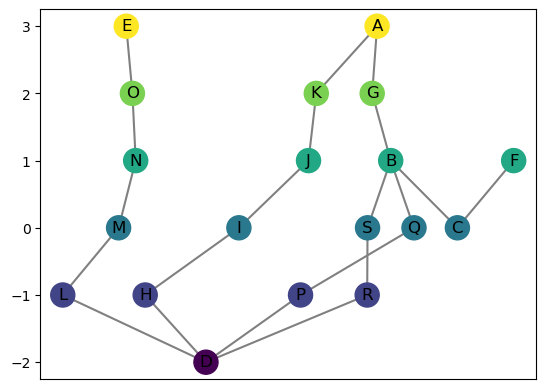

In [2]:
MG = MapperGraph( seed = 0, delta = 1)
MG.add_node('A', f_vertex = 3)
MG.add_node('B', f_vertex = 1)
MG.add_node('C', f_vertex = 0)
MG.add_node('D', f_vertex = -2)
MG.add_node('E', f_vertex = 3)
MG.add_node('F', f_vertex = 1)

MG.add_edge('A','B')
MG.add_edge('B','C')
MG.add_edge('A','D')
MG.add_edge('D','E')
MG.add_edge('D','B')
MG.add_edge('D','B')
MG.add_edge('C','F')

# These positions are the locations for the drawing
MG.set_pos_from_f(seed = 8)

MG.draw(cpx = 1)

We can convert a `ReebGraph` class instance into a  `MapperGraph` class instance. Note that this is **NOT** the same as computing the mapper graph of a Reeb graph treated as the input object. 

{0: 7, 1: 6, 2: 5, 3: 5, 4: 6, 5: 4, 6: 4, 7: 1}


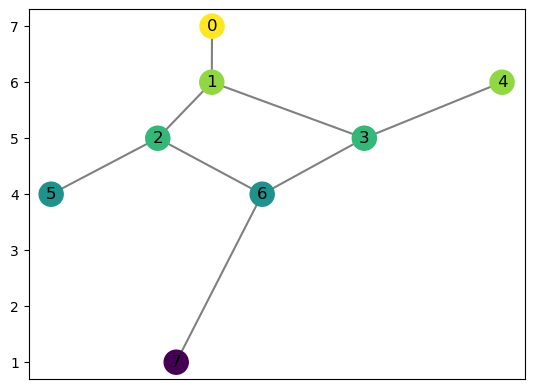

In [3]:
R = ex_rg.dancing_man(seed = 0)
R.draw()
print(R.f)

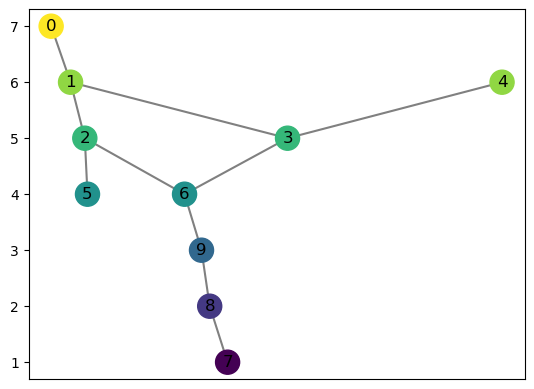

In [4]:
MG = R.to_mapper()
MG.draw()

However, if the Reeb graph has any vertices with a non-integer function value, no mapper graph instance can be created. 

## Smoothing of mapper graph 

We can construct the smoothing of a mapper graph in the same way that we can 

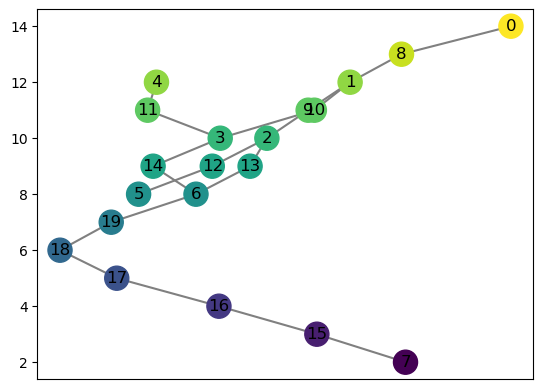

In [5]:
R = ex_rg.dancing_man()
R.f = {v: 2*R.f[v] for v in R.f.keys()}
M = R.to_mapper(delta = 1)
M.draw()

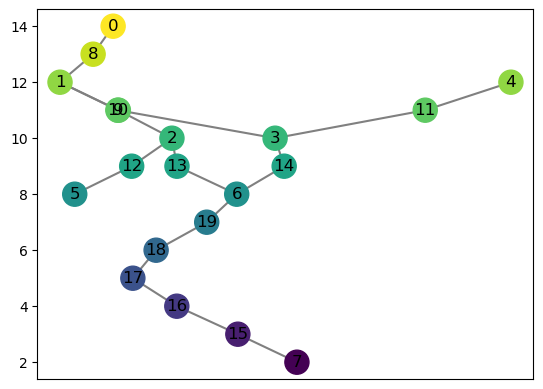

In [6]:
M_n = M.smoothing(n=1)
M.set_pos_from_f(seed = 42)
M.draw()

If we want this to return the map $(M,f) \to S_n(M,f)$ induced by inclusion, we can pass the `return_map = True` flag. 


Original vertex 7 maps to new vertex 1
Original vertex 15 maps to new vertex 2
Original vertex 16 maps to new vertex 3
Original vertex 17 maps to new vertex 4
Original vertex 18 maps to new vertex 5


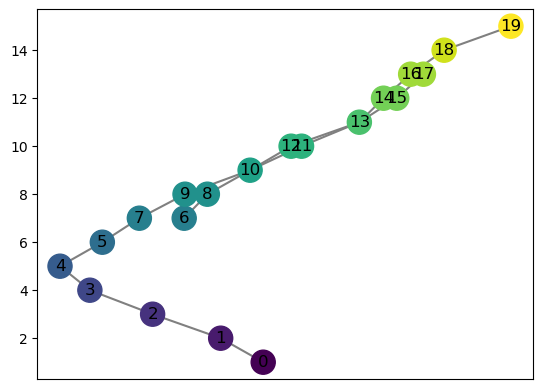

In [13]:
M_n, map_induced = M.smoothing(n=1, return_map = True)

M_n.draw()
for v in list(map_induced.keys())[:5]:
    print(f"Original vertex {v} maps to new vertex {map_induced[v]}")

We can also look at some matrices for the underlying graph. 

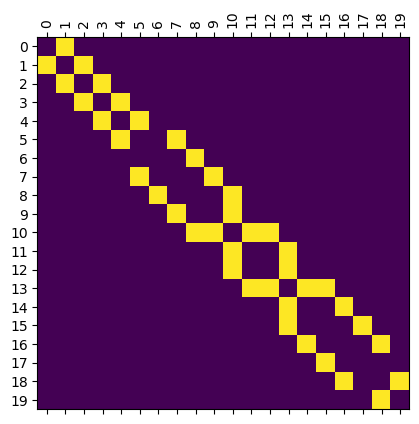

In [14]:
# Returns the adjacency matrix 
A = M_n.adjacency_matrix()

# Plots the adjacency matrix
M_n.plot_adjacency_matrix()

We also have the boundary matrix, where $B[v,e] = 1$ if $v$ is an endpoint of $e$. Note that the edge labels `(u,v,k)` have a third entry in case of multiple edges between $u$ and $v$.

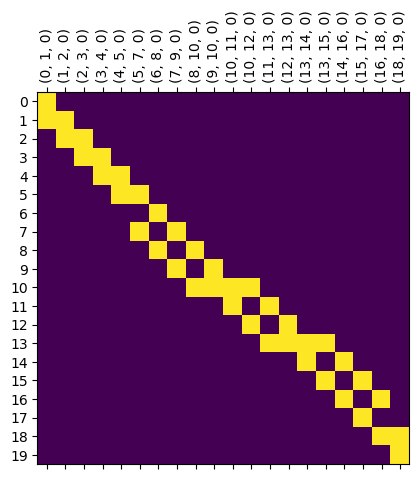

In [16]:
# Returns the boundary matrix 
B = M_n.boundary_matrix()

# Plots the boundary matrix.
M_n.plot_boundary_matrix()